Import all the necessary libraries and set seaborn's color code to default instead of using matplotlib's color scheme.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

sns.set(color_codes = True)

import warnings
warnings.filterwarnings("ignore")

Loading the dataset file from GitHub page.

In [2]:
salary = pd.read_csv('https://raw.githubusercontent.com/CinderLeaf/CIS9660_Lab1/main/ds_salaries.csv')
salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Output the value counts for the experience level column.

In [3]:
salary["experience_level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

Create a **bar chart** to see how many data we have in the dataset, separated by the experience data. We can see that the senior level has the most data, followed by middle level and entry level, and the executive level has the least amount of data in the dataset.

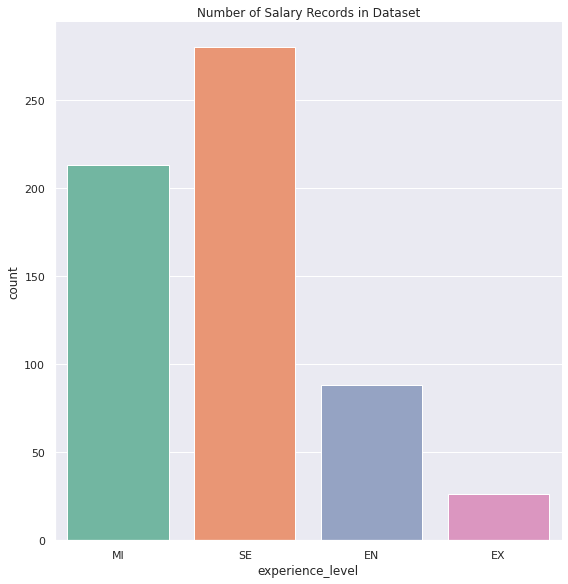

In [4]:
sns.factorplot(x ='experience_level', kind = 'count', data = salary, height = 8, palette='Set2').set(title='Number of Salary Records in Dataset')
  
# show the plots
plt.show()

The **pie chart** is another way of showing the amount of data under each experience level, but it shows the proportion of the data for each level with the percentage of the proportion.

In [5]:
pie_labels = salary["experience_level"].value_counts().index.tolist()
counts = salary["experience_level"].value_counts().tolist()

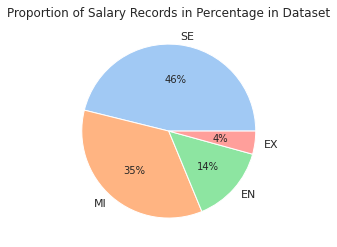

In [6]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(counts, labels = pie_labels, colors = colors, autopct='%.0f%%')
plt.title("Proportion of Salary Records in Percentage in Dataset")
plt.show()

Create a **box plot** to observe the distribution of salary for all the experience level. We can see that there are some outliers towards the top, meaning there is some data with extremely high salary for that experience level.

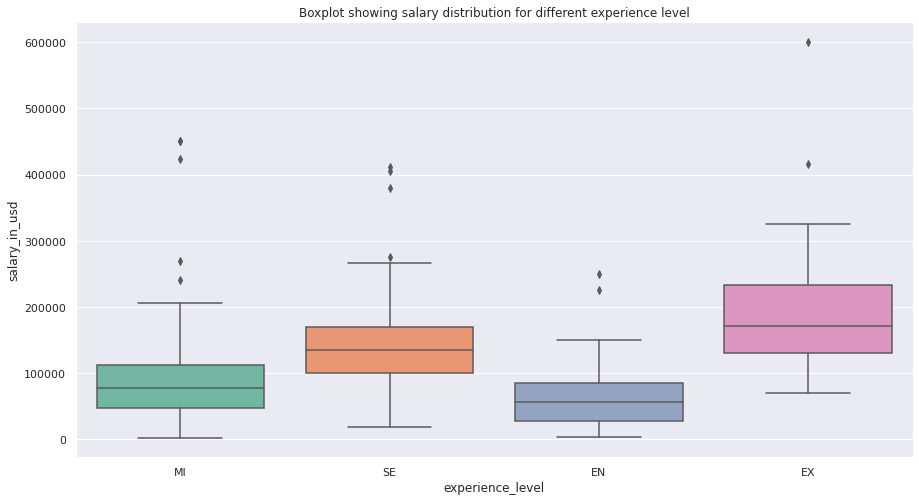

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x = 'experience_level', y = 'salary_in_usd', palette='Set2', data = salary).set(title = 'Boxplot showing salary distribution for different experience level')
plt.show()

Create a **violin plot** to allow us take a closer look at how each data points lay on the plot. We can see where the majority data is for each experience level with the use of swarm plot to show all the data points on top of the violin plot.

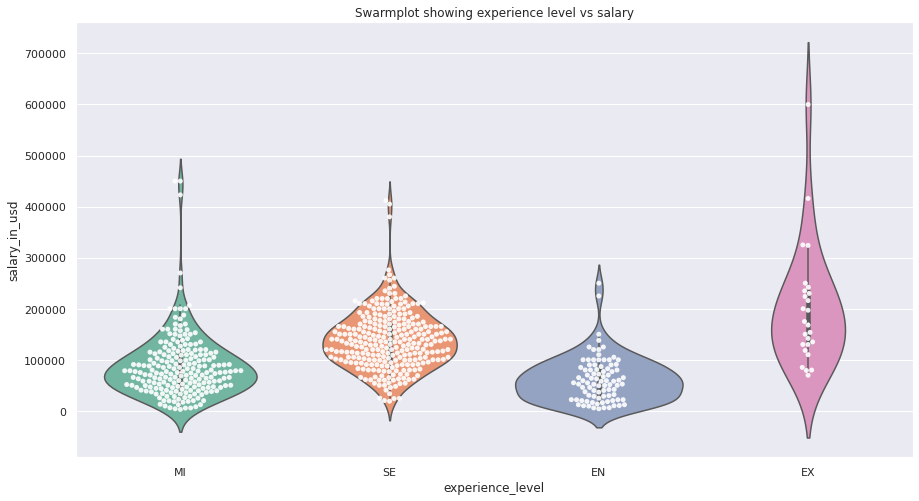

In [8]:
#plotting a violin plot
sns.violinplot(x= 'experience_level', y='salary_in_usd', palette='Set2', data=salary)

#plotting a swarm plot on top of the violin plot
sns.swarmplot(x= 'experience_level', y='salary_in_usd', data=salary, color='w', alpha=.9).set(title='Swarmplot showing experience level vs salary')
plt.show();

Create a **kde plot**, similar to the violin plot and box plot, this allows us to see the distribution of the salary data for each experience level. The kde plot makes it easier for us to compare the salary data that we can see the majority of the entry-level salary is lowest and the majority of the executive-level salary is the highest.

Create a **strip plot** that is similar to the boxplot and violin plot. The strip plot allows us to see both the density and the distribution of the data at the same time. Outliers are also easier to be seen on the strip plot.

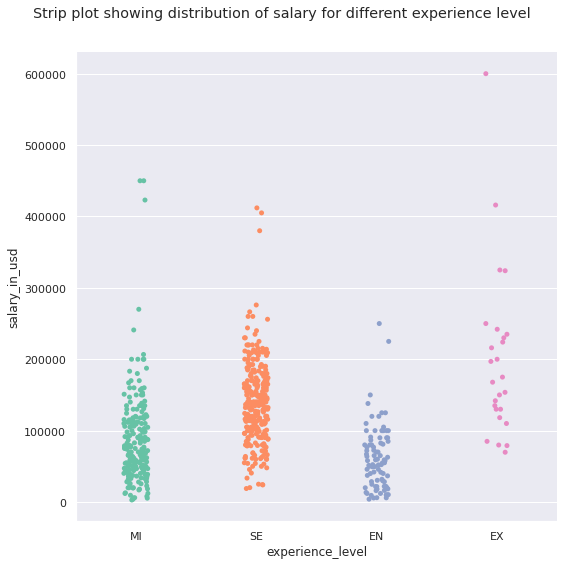

In [9]:
rp = sns.factorplot(x = "experience_level",
                    y = "salary_in_usd",
                    data = salary, 
                    hue = 'experience_level',
                    height = 8,
                    kind = 'strip',
                    palette = 'Set2')
 
# Rotate x-axis labels
rp.fig.subplots_adjust(top = 0.9) # adjust the Figure in rp

rp.fig.suptitle('Strip plot showing distribution of salary for different experience level')
plt.show()

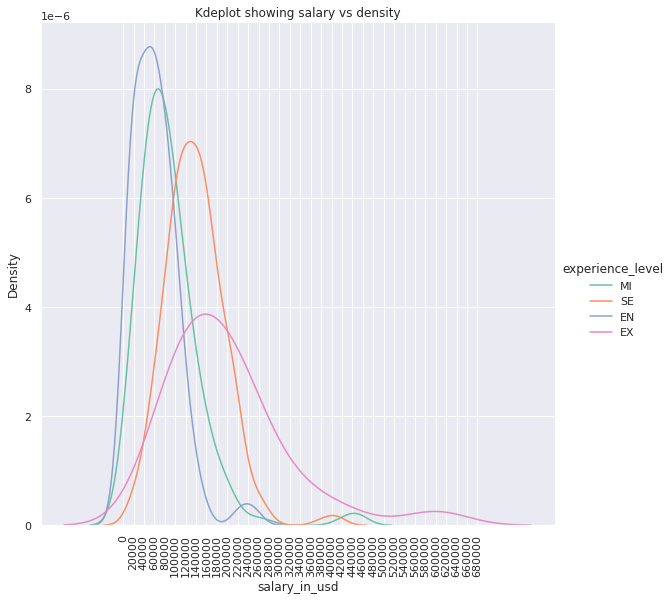

In [10]:
ax = sns.FacetGrid(salary, hue='experience_level', palette='Set2', size=8).map(sns.kdeplot, 'salary_in_usd').add_legend().set(title='Kdeplot showing salary vs density')
ax.set(xticks=np.arange(0,700000,20000))
ax.set_xticklabels(np.arange(0,700000,20000), rotation=90)
plt.show()

The **histogram** shows the distribution for each individual experience level's salary with separate charts. 
The histograms are created with the reference to this link: https://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn

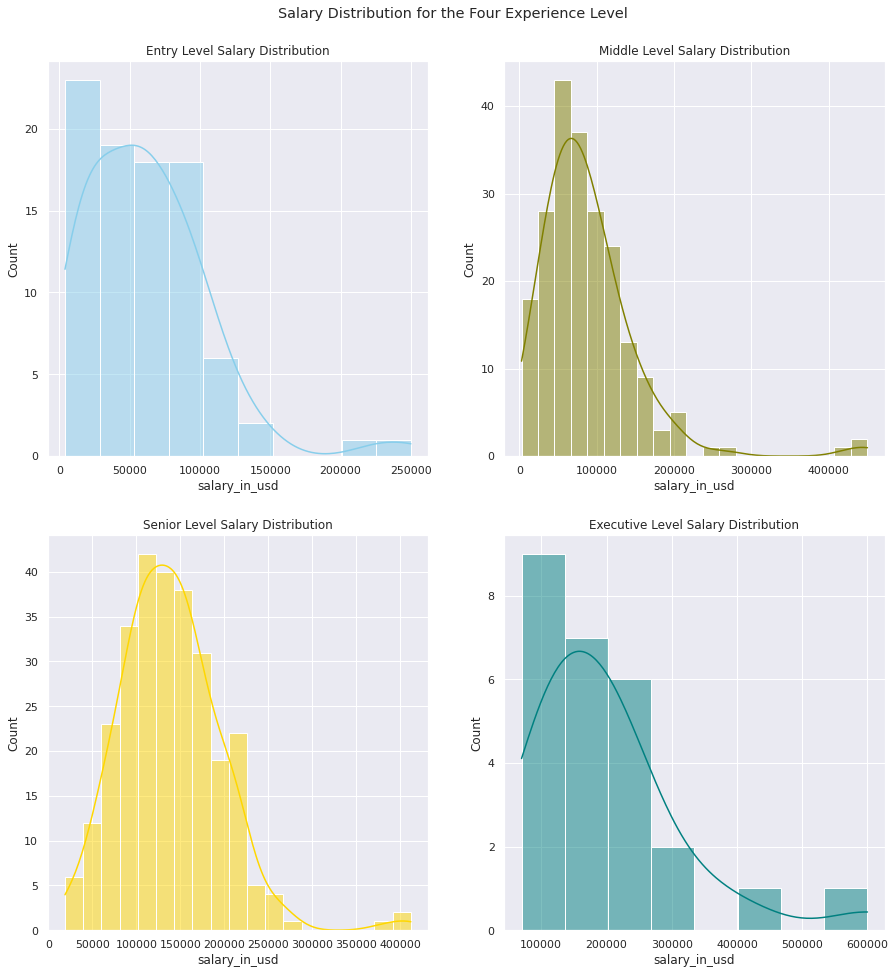

In [11]:
sns.set(style="darkgrid")
en_salary = salary['experience_level'] == 'EN'
mi_salary = salary['experience_level'] == 'MI'
se_salary = salary['experience_level'] == 'SE'
ex_salary = salary['experience_level'] == 'EX'

df1 = salary[en_salary]
df2 = salary[mi_salary]
df3 = salary[se_salary]
df4 = salary[ex_salary]

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(data=df1, x="salary_in_usd", kde=True, color="skyblue", ax=axs[0, 0]).set(title = 'Entry Level Salary Distribution')
sns.histplot(data=df2, x="salary_in_usd", kde=True, color="olive", ax=axs[0, 1]).set(title = 'Middle Level Salary Distribution')
sns.histplot(data=df3, x="salary_in_usd", kde=True, color="gold", ax=axs[1, 0]).set(title = 'Senior Level Salary Distribution')
sns.histplot(data=df4, x="salary_in_usd", kde=True, color="teal", ax=axs[1, 1]).set(title = 'Executive Level Salary Distribution')

plt.suptitle("Salary Distribution for the Four Experience Level")
fig.subplots_adjust(top = 0.93)

plt.show()

I am also curious about the salary for different job title, therefore I output the value counts for all the job titles in the dataset, and choose the four most popular job title to take a closer look at, which are **Data Scientist, Data Engineer, Data Analyst, and Machine Learning Engineer**.

In [12]:
salary['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

From the four job titles I chose from above, I then create **histograms** to show the salary distribution for these job titles in separate charts.

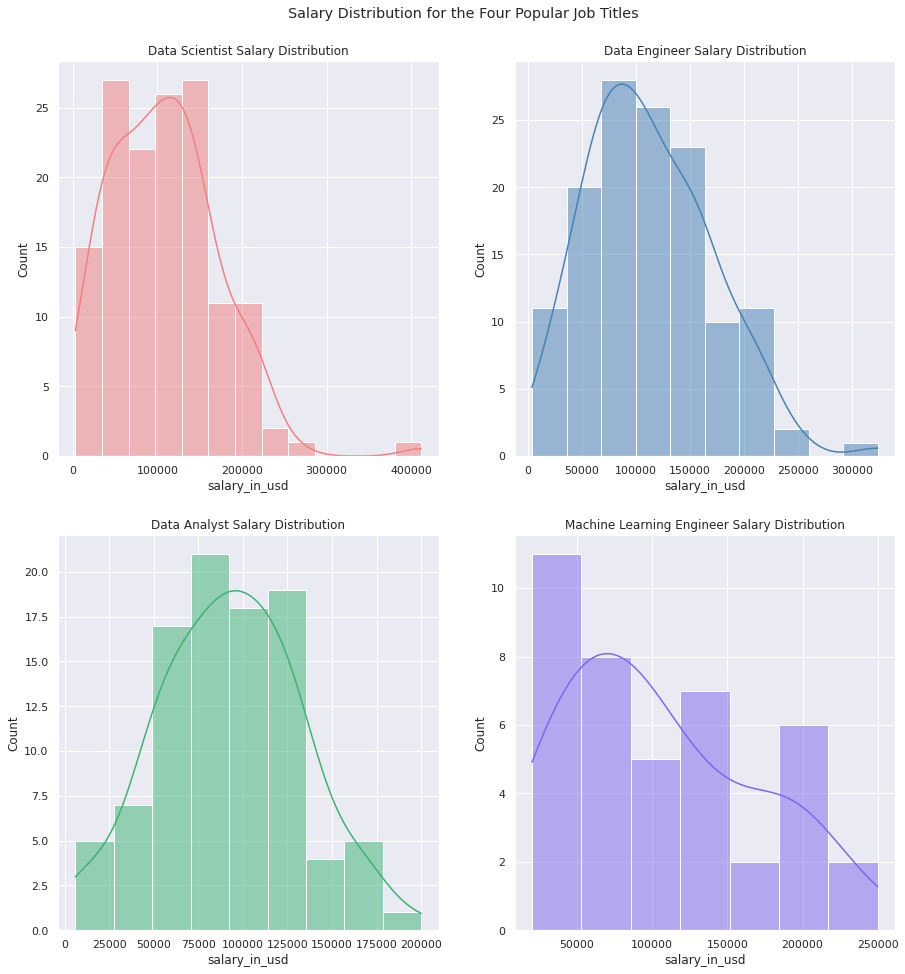

In [13]:
sns.set(style="darkgrid")
ds_salary = salary['job_title'] == 'Data Scientist'
de_salary = salary['job_title'] == 'Data Engineer'
da_salary = salary['job_title'] == 'Data Analyst'
mle_salary = salary['job_title'] == 'Machine Learning Engineer'

df1 = salary[ds_salary]
df2 = salary[de_salary]
df3 = salary[da_salary]
df4 = salary[mle_salary]

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(data=df1, x="salary_in_usd", kde=True, color="lightcoral", ax=axs[0, 0]).set(title = 'Data Scientist Salary Distribution')
sns.histplot(data=df2, x="salary_in_usd", kde=True, color="steelblue", ax=axs[0, 1]).set(title = 'Data Engineer Salary Distribution')
sns.histplot(data=df3, x="salary_in_usd", kde=True, color="mediumseagreen", ax=axs[1, 0]).set(title = 'Data Analyst Salary Distribution')
sns.histplot(data=df4, x="salary_in_usd", kde=True, color="mediumslateblue", ax=axs[1, 1]).set(title = 'Machine Learning Engineer Salary Distribution')

plt.suptitle("Salary Distribution for the Four Popular Job Titles")
fig.subplots_adjust(top = 0.93)

plt.show()

Create a **horizontal bar chart** to compare the median salary for the four job titles.

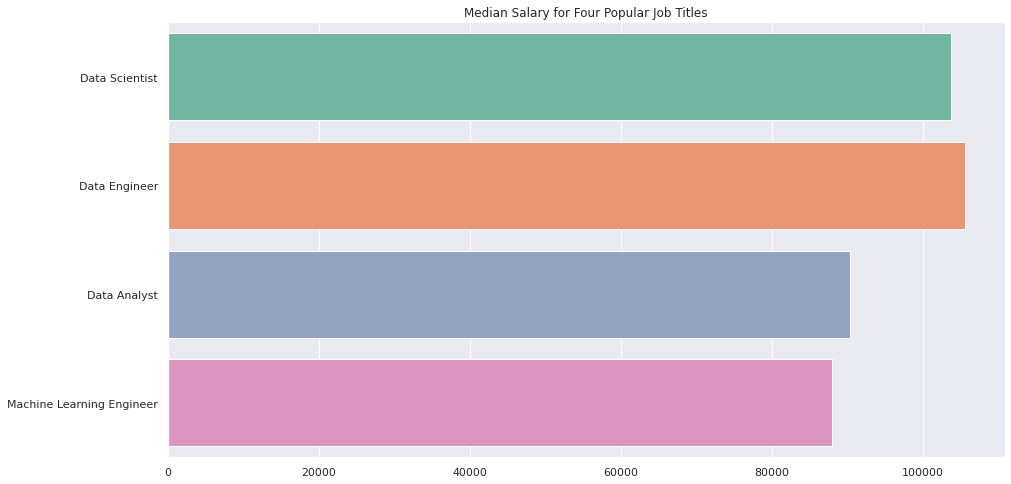

In [14]:
ds_salary_median = statistics.median(df1['salary_in_usd'])
de_salary_median = statistics.median(df2['salary_in_usd'])
da_salary_median = statistics.median(df3['salary_in_usd'])
mle_salary_median = statistics.median(df4['salary_in_usd'])

labels = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer']
data = [ds_salary_median, de_salary_median, da_salary_median, mle_salary_median]

sns.barplot(x = data, y = labels, palette = 'Set2').set(title='Median Salary for Four Popular Job Titles')
plt.show()

Create a **horizontal bar chart** to compare the average salary between the four job titles.

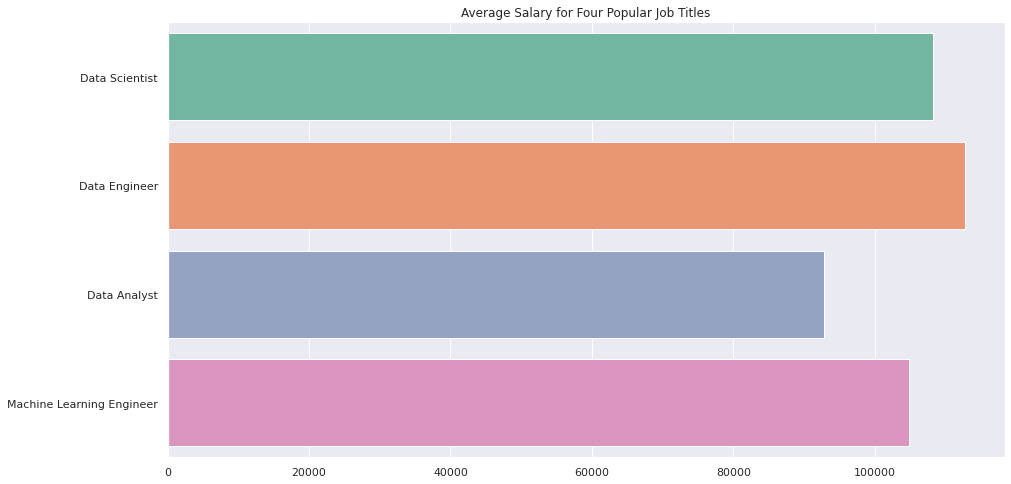

In [15]:
ds_salary_avg = statistics.mean(df1['salary_in_usd'])
de_salary_avg = statistics.mean(df2['salary_in_usd'])
da_salary_avg = statistics.mean(df3['salary_in_usd'])
mle_salary_avg = statistics.mean(df4['salary_in_usd'])

labels = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer']
data = [ds_salary_avg, de_salary_avg, da_salary_avg, mle_salary_avg]

sns.barplot(x = data, y = labels, palette = 'Set2').set(title='Average Salary for Four Popular Job Titles')
plt.show()